## **In this project, we will `forecast the weather` using a time series forecasting tool known as `NeuralProphet`.**




*   The hybrid forecasting framework` NeuralProphet` is built on PyTorch and trained using common deep learning techniques, making it simple for developers to add new features.




In [ ]:
# Installing NeuralProphet using pip

!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Necessary Imports 

import pandas as pd
from neuralprophet import NeuralProphet
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# Loading our dataset using Pandas and printing last 5 rows of dataset

df = pd.read_csv('weather.csv')
df.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


# **Exploratory data analysis**

In [ ]:
# Printing dates of our dataset from 2013-12-21 to 2017-07-31

df.Date.unique()

array(['2013-12-21', '2013-12-22', '2013-12-23', ..., '2017-07-29',
       '2017-07-30', '2017-07-31'], dtype=object)

In [ ]:
# Print all the columns of our dataset

df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

# **Preprocessing the data**

In [ ]:
# Printing the data types of each column in our dataset

df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [ ]:
# Changing data type of Date from object ti datetime

df ['Date'] = pd.to_datetime(df ['Date'])

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


In [ ]:
# Checking the data type 

df.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                         object
DewPointAvgF                          object
DewPointLowF                          object
HumidityHighPercent                   object
HumidityAvgPercent                    object
HumidityLowPercent                    object
SeaLevelPressureHighInches            object
SeaLevelPressureAvgInches             object
SeaLevelPressureLowInches             object
VisibilityHighMiles                   object
VisibilityAvgMiles                    object
VisibilityLowMiles                    object
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object

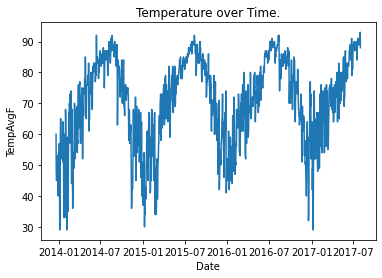

In [ ]:
# Using plt.plot() method from Matplotlib to plot graph.
# We’ve passed df['Date'] as the x variable and df ['TempAvgF'] as the y variable.

plt.plot(df ['Date'], df ['TempAvgF'])

plt.title("Temperature over Time.")
plt.xlabel("Date")
plt.ylabel("TempAvgF")


plt.show()

In [ ]:
# Filtering out columns as Neural Prophet only expects two columns.

new_df = df[['Date', 'TempAvgF']] 
new_df.dropna(inplace=True)


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



In [ ]:
# The ds column is a timestamp, and a y column is the numeric one we want to predict.

new_df.columns = ['ds', 'y'] 
new_df.tail()

,ds,y
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93
1318,2017-07-31,88


In [ ]:
# Checkin is there any missing values

new_df.isna().sum()

ds    0
y     0
dtype: int64

# **Training the forecasting model**

In [ ]:
n = NeuralProphet()
model = n.fit(new_df, freq='D', epochs=5000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# **Forecasting the temperature into the future**

In [ ]:
# Forecasting for 1500 days into the future. Using the n.predict() method to  predict our future values.

future = n.make_future_dataframe(new_df, periods=1000)
forecast = n.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

Predicting: 42it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
#  printing prediction

forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2017-08-01,None,90.068817,74.254196,15.380046,0.434572
1,2017-08-02,None,89.950005,74.259674,15.424329,0.265999
2,2017-08-03,None,89.899857,74.265167,15.462177,0.172514
3,2017-08-04,None,89.675301,74.270653,15.492917,-0.088265
4,2017-08-05,None,89.357895,74.276138,15.515892,-0.434133
...,...,...,...,...,...,...
995,2020-04-22,None,80.963165,79.713165,0.983992,0.265999
996,2020-04-23,None,80.948547,79.718658,1.057378,0.172514
997,2020-04-24,None,80.761482,79.724136,1.125604,-0.088265
998,2020-04-25,None,80.484985,79.729630,1.189486,-0.434133


# **Visualizing the predictions**

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


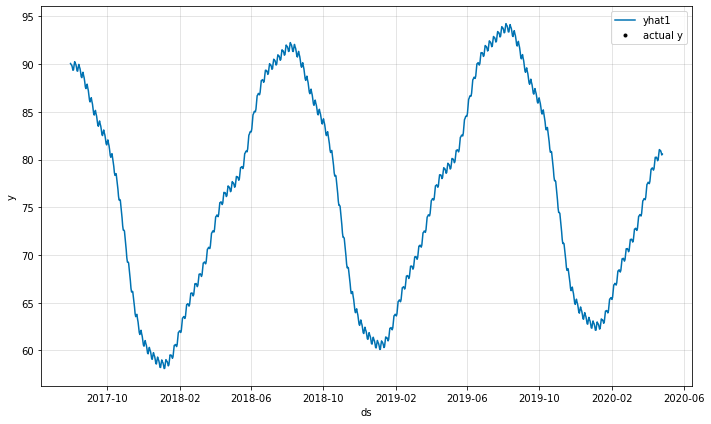

In [ ]:
plot = n.plot(forecast)